In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("homeprices.xlsx")
data.head()
# Area is in square-feet and price is in lacs

,Area,Price
0,437,30
1,438,31
2,450,32
3,497,34
4,508,36


In [3]:
data.describe()

,Area,Price
count,35.000000,35.000000
mean,664.771429,46.971429
std,122.034731,9.141006
min,437.000000,30.000000
25%,597.000000,39.500000
50%,662.000000,48.000000
75%,748.000000,55.500000
max,887.000000,60.000000


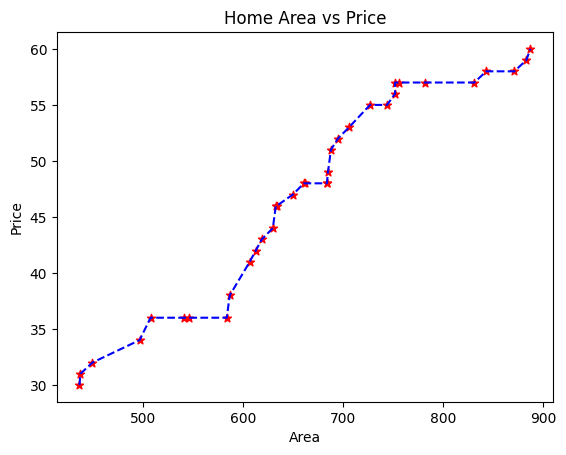

In [4]:
%matplotlib inline
plt.title("Home Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(data["Area"], data["Price"], color="red", marker = "*") # Will plot scatter
plt.plot(data["Area"], data["Price"], "b--")  # will plot line
plt.show()

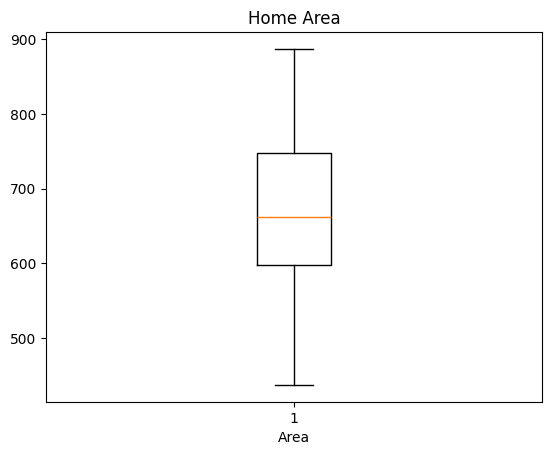

In [5]:
%matplotlib inline
plt.title("Home Area")
plt.xlabel("Area")
plt.boxplot(data["Area"])
plt.show()

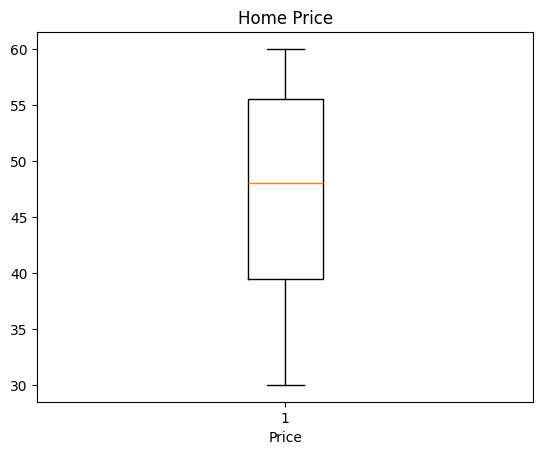

In [6]:
%matplotlib inline
plt.title("Home Price")
plt.xlabel("Price")
plt.boxplot(data["Price"])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
X = data.drop("Price", axis=1)
y = data["Price"]

In [10]:
X.head(2)

,Area
0,437
1,438


In [11]:
y.head(2)

0    30
1    31
Name: Price, dtype: int64

In [12]:
lr.fit(X, y)

LinearRegression()

In [13]:
lr.predict([[740]])

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52.42042166])

In [14]:
y_pred = lr.predict(X)

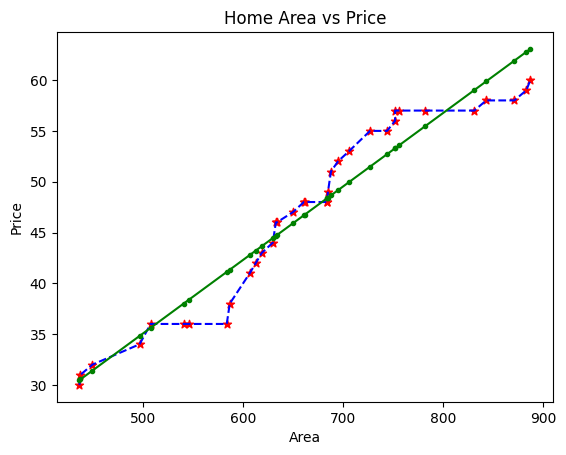

In [15]:
%matplotlib inline
plt.title("Home Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(data["Area"], data["Price"], color="red", marker = "*")
plt.plot(data["Area"], data["Price"], "b--")  # will plot line
plt.plot(data["Area"], y_pred, "g.-")
plt.show()

In [16]:
m = lr.coef_    # Slope / Coefficient
c = lr.intercept_    # Intercept

In [17]:
m*740+c

array([52.42042166])

In [18]:
print("Slope", m)
print("Intercept", c)

Slope [0.07243249]
Intercept -1.179624293944407


--------------------------------------------------------------------------------

In [19]:
import numpy as np

In [20]:
X1 = np.random.randint(100, 900, 30)

In [21]:
Y1 = np.random.randint(10, 50, 30)

In [22]:
X1

array([126, 259, 362, 562, 661, 214, 170, 633, 862, 295, 842, 344, 354,
       738, 655, 142, 779, 266, 247, 249, 275, 880, 613, 767, 508, 334,
       562, 687, 347, 602])

In [23]:
Y1

array([38, 49, 46, 33, 26, 32, 39, 40, 13, 26, 19, 22, 33, 45, 21, 18, 18,
       17, 48, 29, 18, 49, 19, 19, 30, 37, 22, 42, 21, 25])

In [24]:
X1.sort()

In [25]:
Y1.sort()

In [26]:
data = {"Input":X1, "Output":Y1}

In [27]:
data

{'Input': array([126, 142, 170, 214, 247, 249, 259, 266, 275, 295, 334, 344, 347,
        354, 362, 508, 562, 562, 602, 613, 633, 655, 661, 687, 738, 767,
        779, 842, 862, 880]),
 'Output': array([13, 17, 18, 18, 18, 19, 19, 19, 21, 21, 22, 22, 25, 26, 26, 29, 30,
        32, 33, 33, 37, 38, 39, 40, 42, 45, 46, 48, 49, 49])}

In [28]:
df = pd.DataFrame(data)

In [29]:
df.head()

,Input,Output
0,126,13
1,142,17
2,170,18
3,214,18
4,247,18


In [30]:
lr2 = LinearRegression()

In [31]:
lr2.fit(df.drop("Output", axis=1), df["Output"])

LinearRegression()

In [32]:
y_pred2 = lr2.predict(df.drop("Output", axis=1))

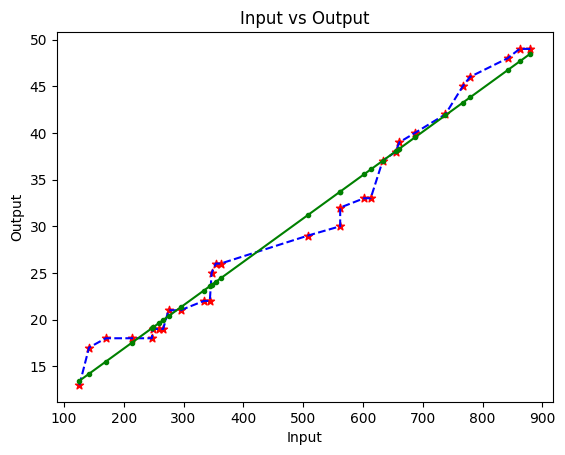

In [33]:
%matplotlib inline
plt.title("Input vs Output")
plt.xlabel("Input")
plt.ylabel("Output")
plt.scatter(df["Input"], df["Output"], color="red", marker = "*")
plt.plot(df["Input"], df["Output"], "b--")  # will plot line
plt.plot(df["Input"], y_pred2, "g.-")
plt.show()

In [34]:
y = df["Output"]

In [35]:
y_mean = y.mean()

In [36]:
y_mean

29.8

In [37]:
MSE = (((y - y_pred2)**2).sum())/len(y)
MSE

2.642977486314796

In [38]:
MAE = (np.abs((y - y_pred2)).sum())/len(y)
MAE

1.3060699692485918

In [39]:
R2 = 1 - ((y - y_pred2)**2).sum() / ((y - y_mean)**2).sum()
R2

0.9778941327675242

In [40]:
Adj_R2 = 1 - ((1-R2)*(len(y)-1))/(len(y) -len(df.drop("Output",axis=1).columns)-1)
Adj_R2

0.9771046375092215

In [41]:
from sklearn.metrics import mean_absolute_error, r2_score

In [42]:
mean_absolute_error(y, y_pred2)

1.3060699692485918

In [43]:
r2_score(y, y_pred2)

0.9778941327675242